___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

## Mr. Orion suggest to use the recall #-----------------------

# Improt Libraries & Data

In [147]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [148]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [149]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_confusion_matrix
from ipywidgets import interact
#data
import numpy as np
import pandas as pd
import random
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
#sklearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
#from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#model saving
import pickle
from tensorflow.keras.models import load_model

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [150]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

This session will run on CPU.


In [151]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

### EDA

In [152]:
df.shape

(10000, 14)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [154]:
df.describe()

RowNumber   CustomerId  CreditScore       Age    Tenure    Balance  \
count  10000.000    10000.000    10000.000 10000.000 10000.000  10000.000   
mean    5000.500 15690940.569      650.529    38.922     5.013  76485.889   
std     2886.896    71936.186       96.653    10.488     2.892  62397.405   
min        1.000 15565701.000      350.000    18.000     0.000      0.000   
25%     2500.750 15628528.250      584.000    32.000     3.000      0.000   
50%     5000.500 15690738.000      652.000    37.000     5.000  97198.540   
75%     7500.250 15753233.750      718.000    44.000     7.000 127644.240   
max    10000.000 15815690.000      850.000    92.000    10.000 250898.090   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
count      10000.000  10000.000       10000.000        10000.000 10000.000  
mean           1.530      0.706           0.515       100090.240     0.204  
std            0.582      0.456           0.500        57510.493     0.403  
min            1.000      0.000           0.000           11.580     0.000  
25%            1.000      0.000           0.000        51002.110     0.000  
50%            1.000      1.000           1.000       100193.915     0.000  
75%            2.000      1.000           1.000       149388.247     0.000  
max            4.000      1.000           1.000       199992.480     1.000

In [155]:
df.describe(include=['object'])

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [156]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [157]:
#check for any duplicates
df.duplicated().sum()

0

In [158]:
# the target variable
df["Exited"].unique()

array([1, 0], dtype=int64)

In [159]:
#check for target variable balance
df["Exited"].value_counts()

#as we can see the dataset is imbalanced

Exited
0    7963
1    2037
Name: count, dtype: int64

### Missing values and Droping unwanted features

In [160]:
df.isnull().sum().any()

False

#### drop unwanted cloumns

In [161]:
#Some of the features are irrelevant and some could affect the performance so we will  drop them

#drop 'RowNumber', 'CustomerId', 'Surname': irrelevant
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

### Some Visualizations

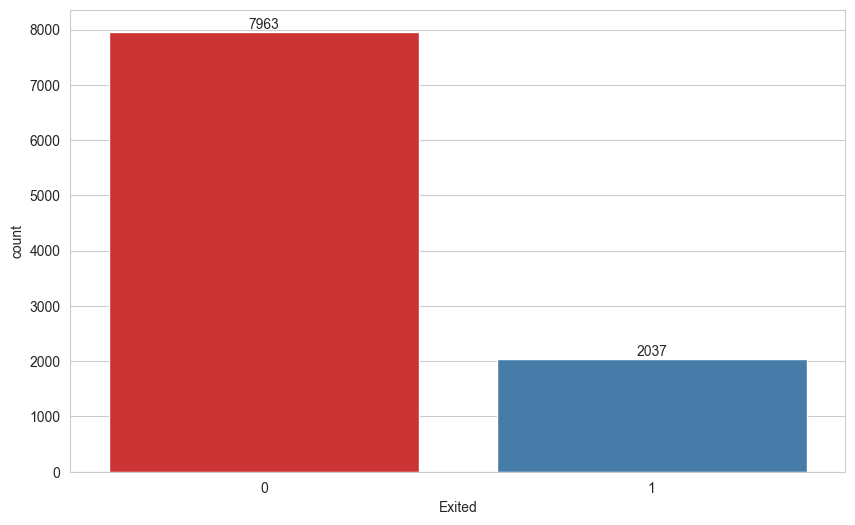

In [162]:
# value counts for the target columns
ax = sns.countplot(x='Exited', data=df, palette = "Set1")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

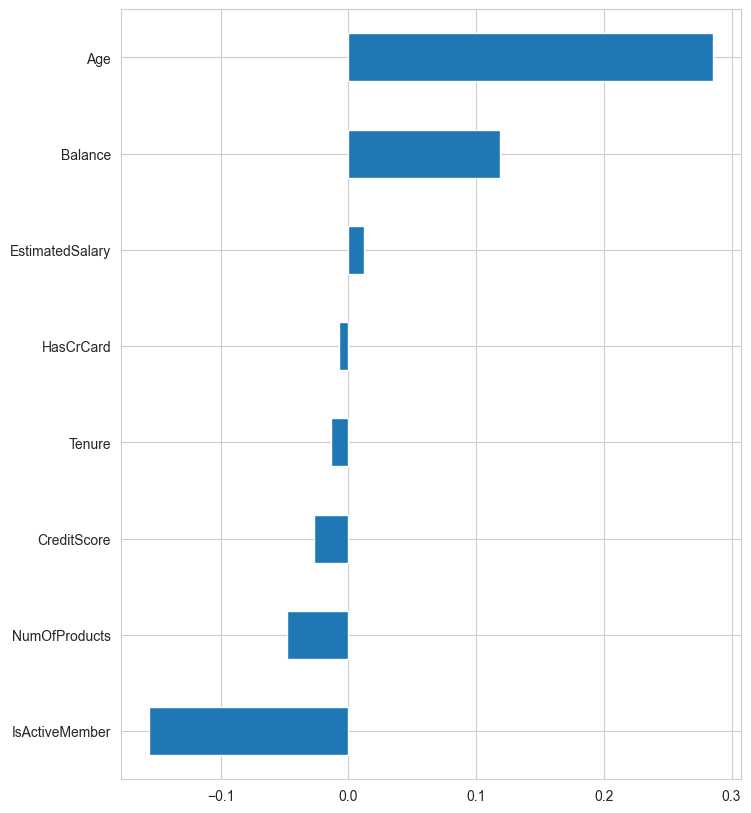

In [163]:
plt.figure(figsize=(8, 10))
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

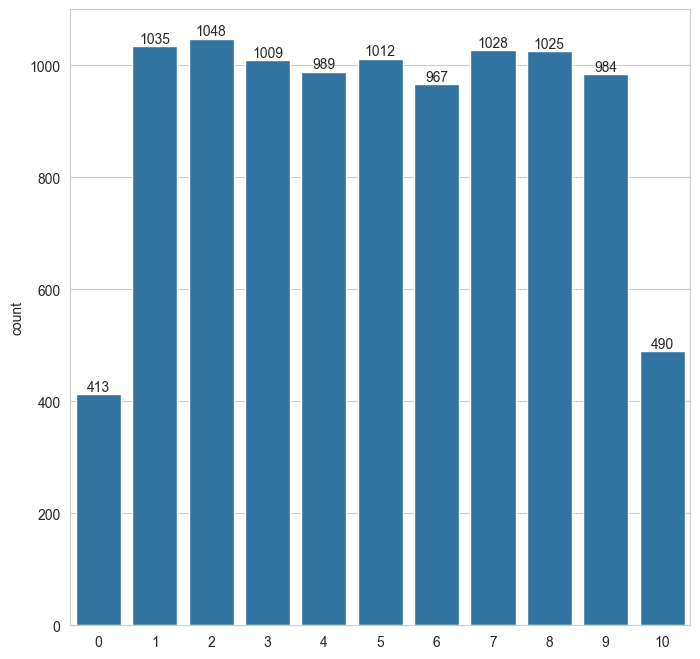

In [164]:
plt.figure(figsize=(8,8))
x = sns.countplot(x ='Tenure', data = df)
plt.title('')
plt.xlabel('')
x.bar_label(x.containers[0]);

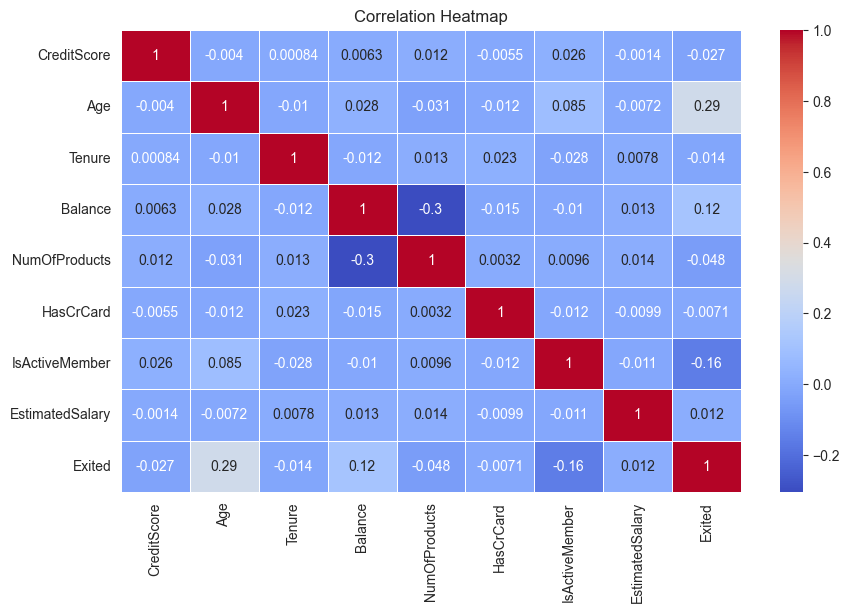

In [165]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

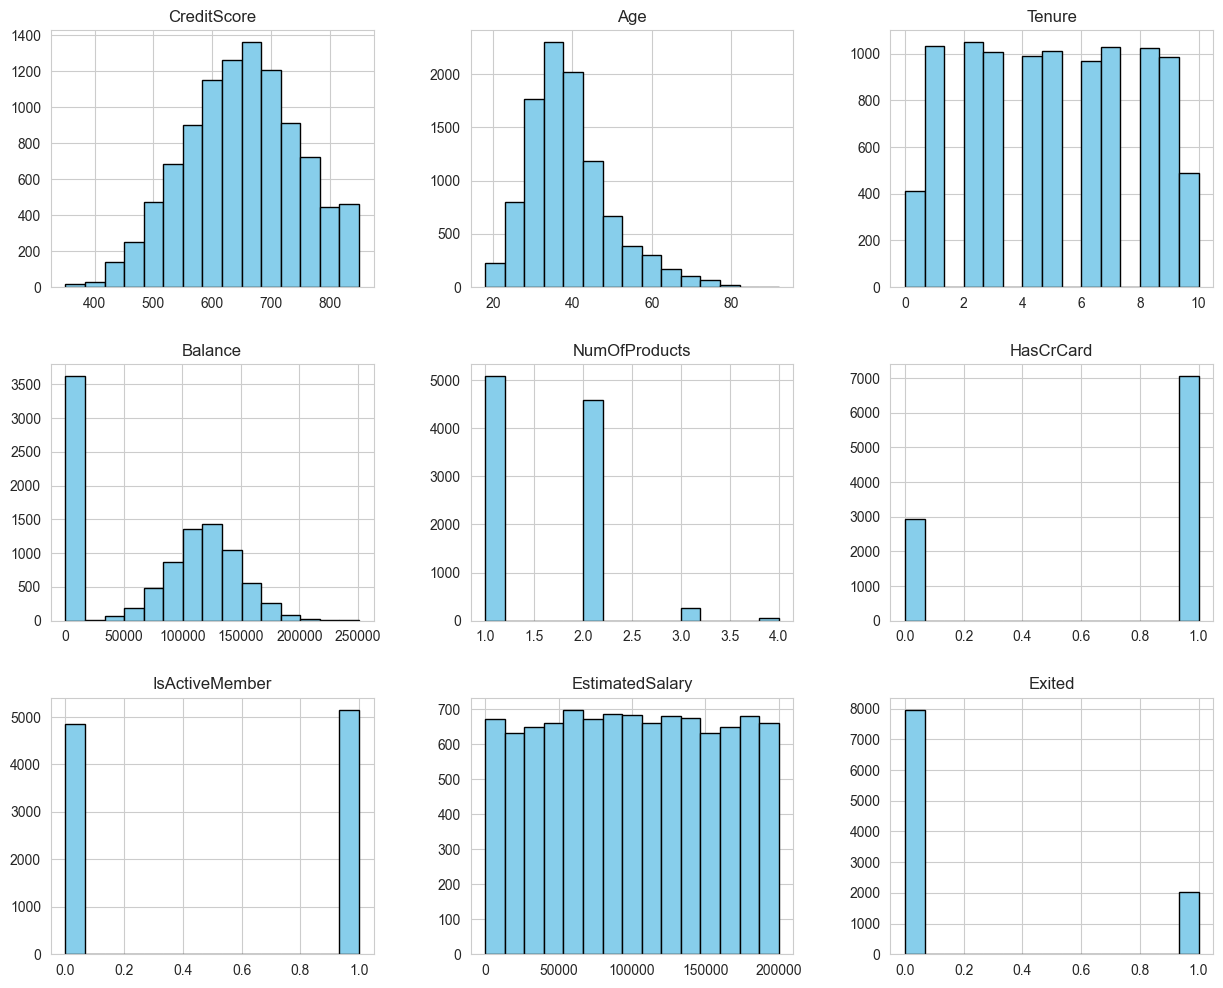

In [166]:
df.hist(figsize=(15, 12), bins=15, color='skyblue', edgecolor='black')
plt.show()

In [167]:

#box plot
def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);


interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

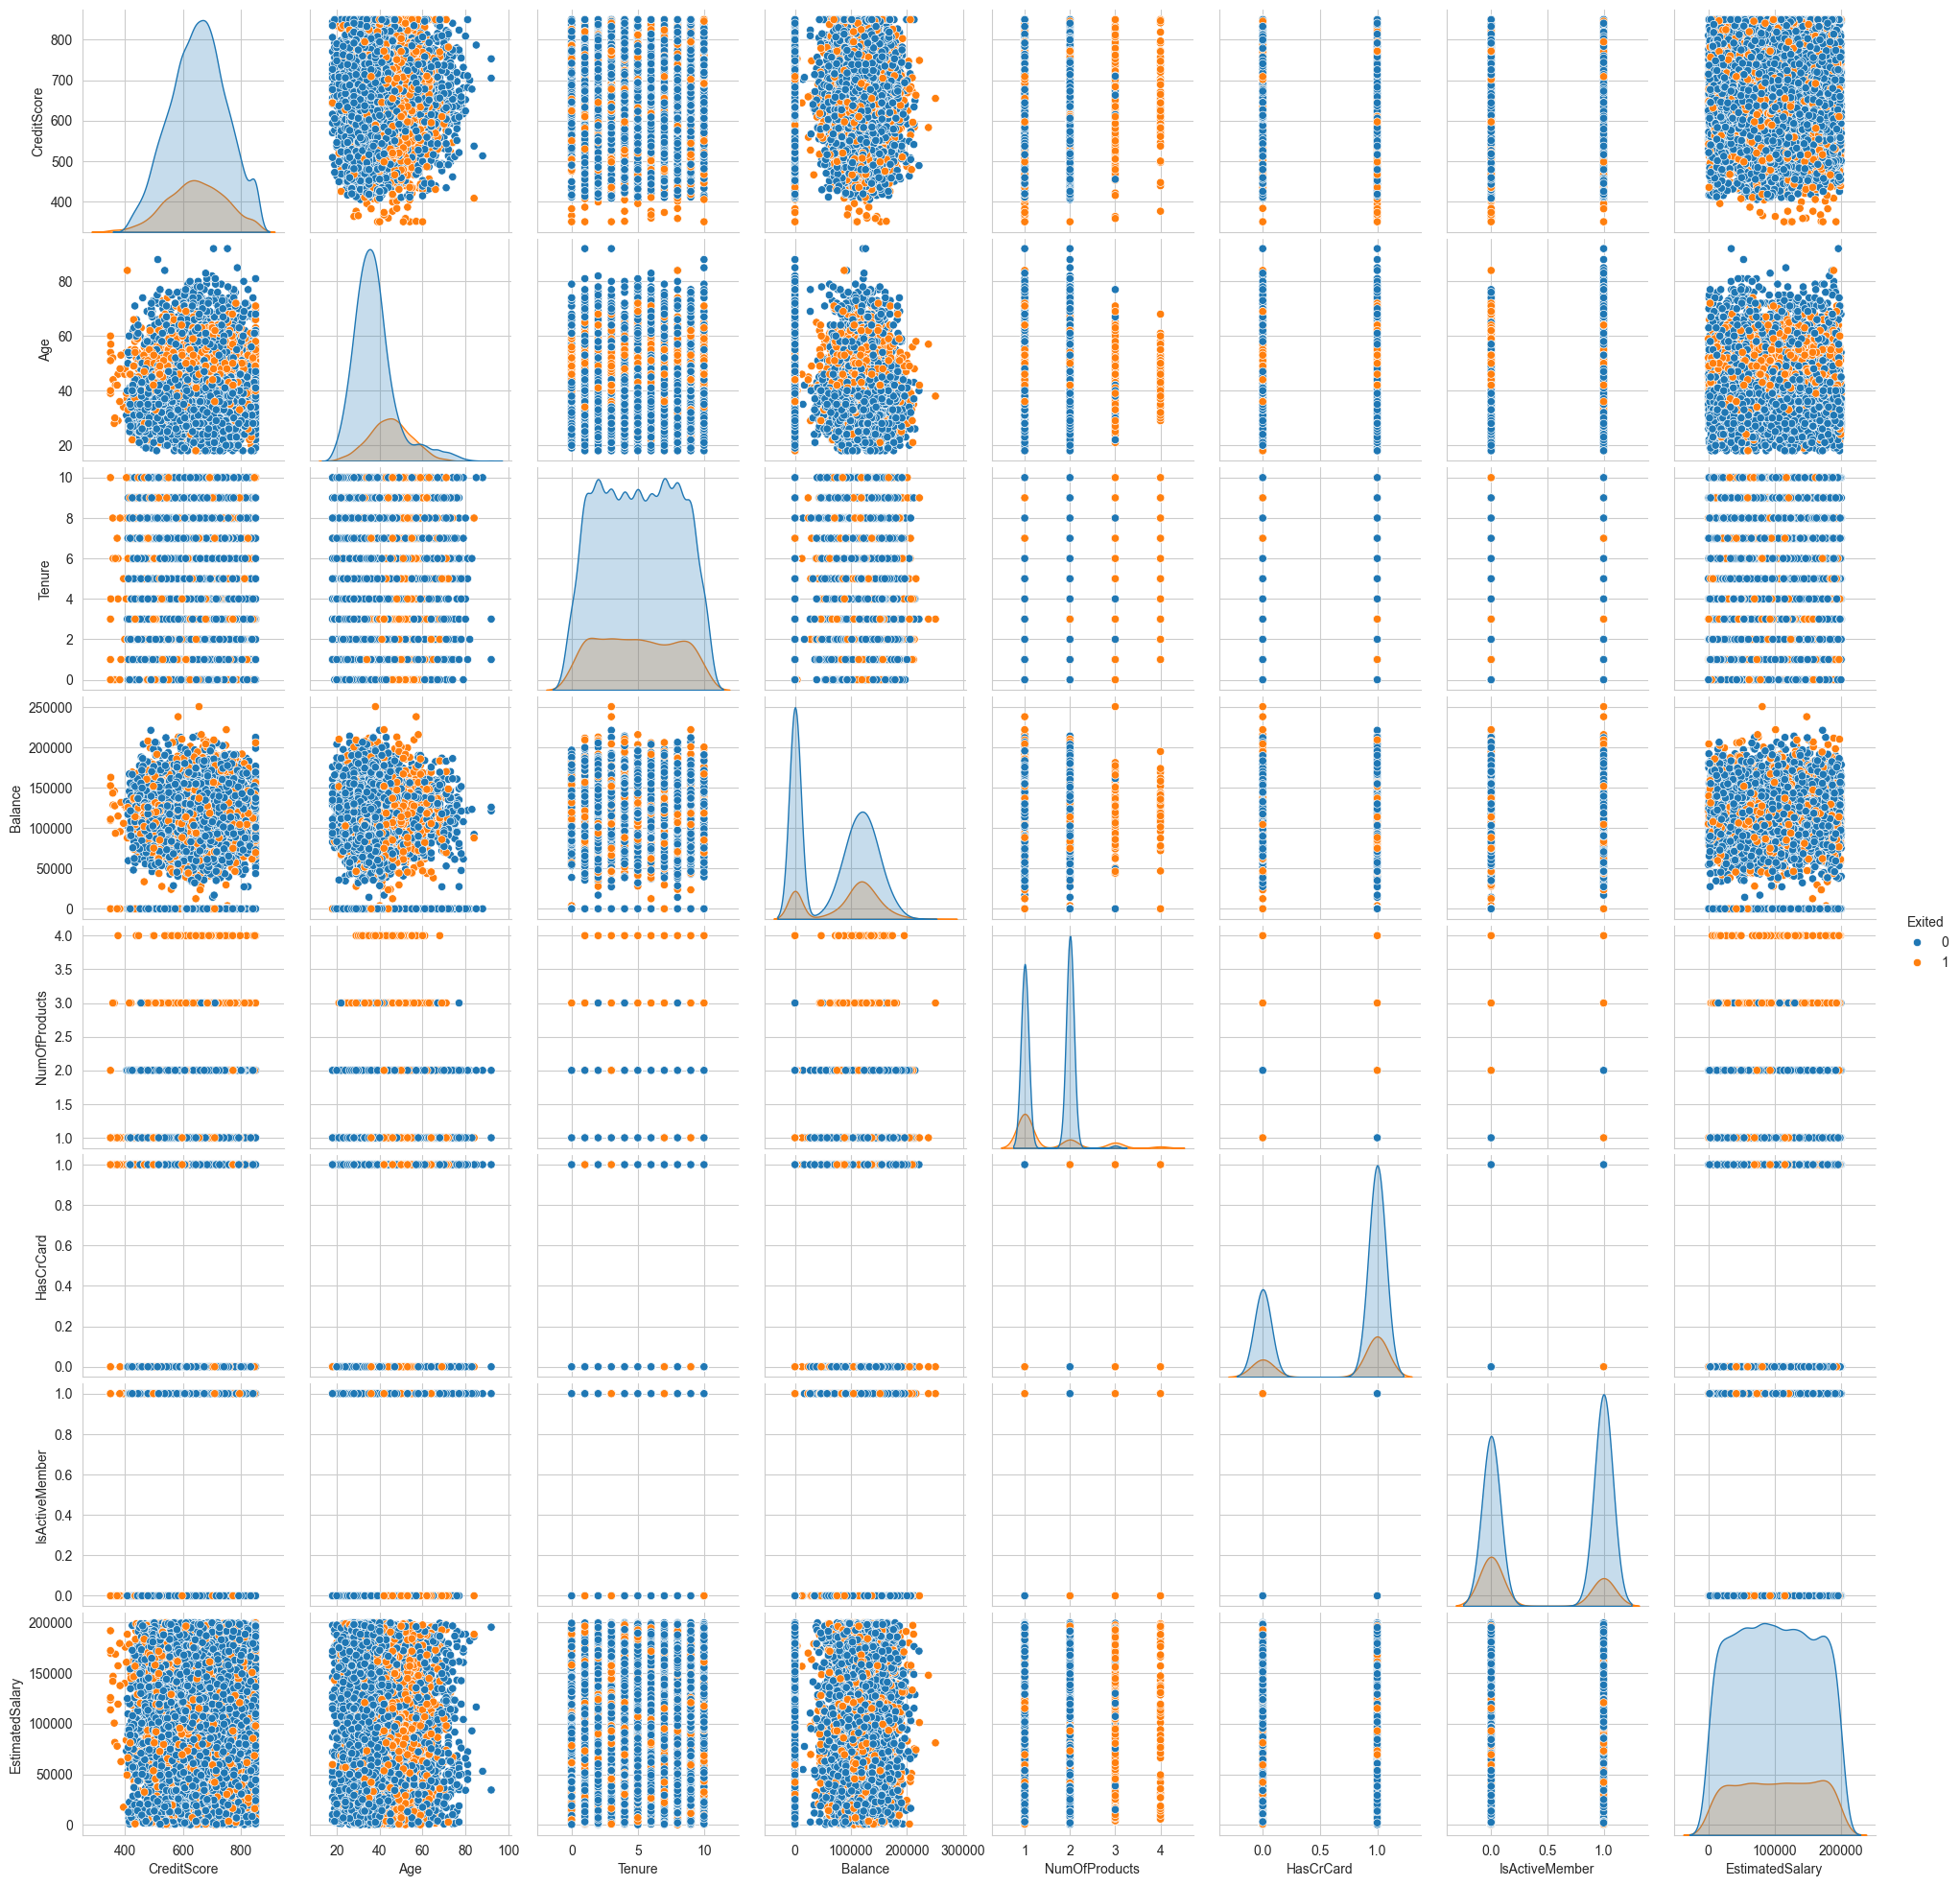

In [168]:

sns.pairplot(df, hue = 'Exited')


### Convert the Categorical variables and Scalers

In [169]:
df.select_dtypes("object").columns

Index(['Geography', 'Gender'], dtype='object')

In [170]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [171]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [172]:
df["Gender"] = df["Gender"].map({"Female":0, "Male":1})
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [173]:
df['CreditScore']

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [289]:
column_trans = make_column_transformer(
                (OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              ["Geography"]),
                (MinMaxScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']),
                              remainder = 'passthrough', #passthrough will allow the features that are already 0-1 and not in the list of any scaler to be stayed and not be removed
                              verbose_feature_names_out=False)

# Preprocessing of Data
- Train | Test Split, Scalling

In [290]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.10,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.10, 
                                                  random_state = 42,
                                                  stratify = y_train)

In [292]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)
X_val = column_trans.transform(X_val)

In [293]:
X_train.shape

(8100, 12)

In [294]:
X_test.shape

(1000, 12)

# Modelling & Model Performance

In [295]:
def roc_auc_plot(y_train, pred_train, y_test, pred_test):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

## without class_weigth

### Create The Model

In [296]:
seed = 42
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [297]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=300,
    verbose=1,
)
#everytime you implement a DL model you should use early stoping. but here for
# the purpose of learning we did not

Epoch 1/300
127/127 [==============================] - 2s 4ms/step - loss: 0.6776 - recall: 0.0800 - val_loss: 0.6591 - val_recall: 0.0000e+00
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6442 - recall: 0.0000e+00 - val_loss: 0.6299 - val_recall: 0.0000e+00
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6175 - recall: 0.0000e+00 - val_loss: 0.6055 - val_recall: 0.0000e+00
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5954 - recall: 0.0000e+00 - val_loss: 0.5852 - val_recall: 0.0000e+00
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5770 - recall: 0.0000e+00 - val_loss: 0.5686 - val_recall: 0.0000e+00
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5619 - recall: 0.0000e+00 - val_loss: 0.5550 - val_recall: 0.0000e+00
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5496 - recall: 0.0000e+00 - val_loss: 0.5439 

In [298]:
model.summary()

Model: "sequential_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_528 (Dense)           (None, 32)                416       
                                                                 
 dense_529 (Dense)           (None, 16)                528       
                                                                 
 dense_530 (Dense)           (None, 4)                 68        
                                                                 
 dense_531 (Dense)           (None, 1)                 5         
                                                                 
Total params: 1017 (3.97 KB)
Trainable params: 1017 (3.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

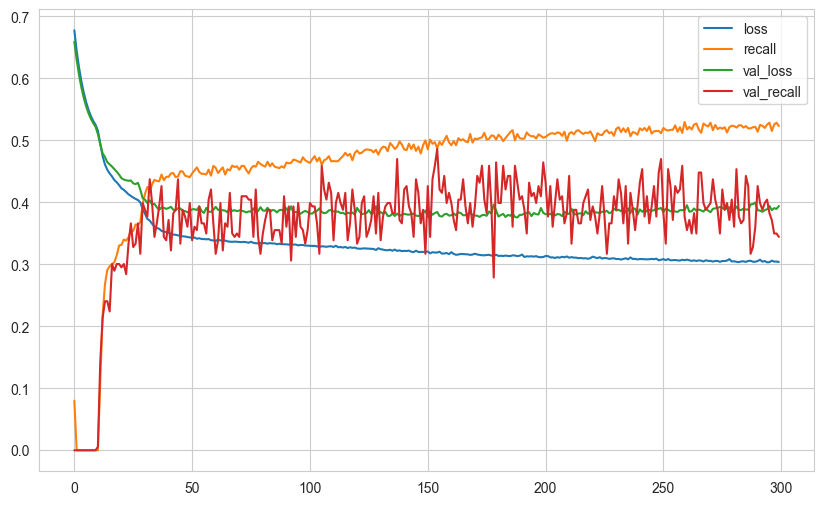

In [299]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [300]:
loss, no_weight_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", no_weight_recall)

loss:  0.3566640317440033
accuracy:  0.4362744987010956


In [301]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[6321  129]
 [ 835  815]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6450
           1       0.86      0.49      0.63      1650

    accuracy                           0.88      8100
   macro avg       0.87      0.74      0.78      8100
weighted avg       0.88      0.88      0.87      8100



In [302]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[772  24]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.79      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.83      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



In [303]:
roc_auc_score(y_test, y_pred)

0.7030618780175387

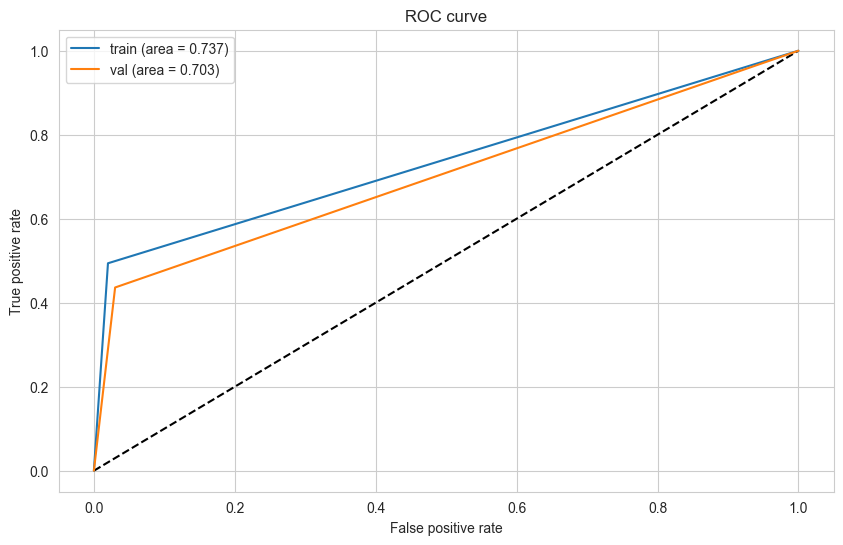

In [304]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [305]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [306]:
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [307]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [308]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=300,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/300
127/127 [==============================] - 1s 4ms/step - loss: 0.6709 - recall: 0.7945 - val_loss: 0.7003 - val_recall: 0.6448
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6444 - recall: 0.7648 - val_loss: 0.7025 - val_recall: 0.6995
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6262 - recall: 0.7479 - val_loss: 0.6944 - val_recall: 0.7158
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6117 - recall: 0.7236 - val_loss: 0.7098 - val_recall: 0.7432
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5965 - recall: 0.7091 - val_loss: 0.6763 - val_recall: 0.7432
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5790 - recall: 0.7230 - val_loss: 0.6474 - val_recall: 0.7104
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5593 - recall: 0.7273 - val_loss: 0.6351 - val_recall: 0.7322
Epoch 8/300
127/127 [======

In [309]:
model.summary()

Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_532 (Dense)           (None, 32)                416       
                                                                 
 dense_533 (Dense)           (None, 16)                528       
                                                                 
 dense_534 (Dense)           (None, 4)                 68        
                                                                 
 dense_535 (Dense)           (None, 1)                 5         
                                                                 
Total params: 1017 (3.97 KB)
Trainable params: 1017 (3.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

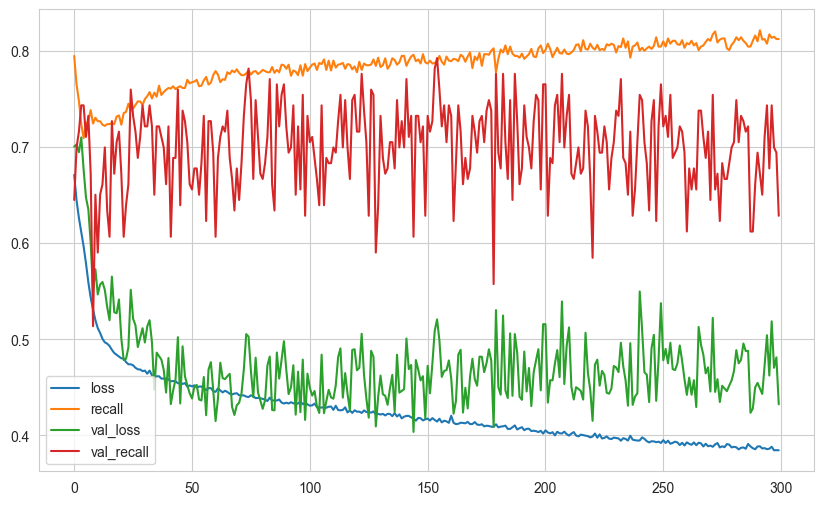

In [310]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [311]:
loss, wieght_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", wieght_recall)

loss:  0.4214858412742615
accuracy:  0.6911764740943909


In [312]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[5643  807]
 [ 372 1278]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      6450
           1       0.61      0.77      0.68      1650

    accuracy                           0.85      8100
   macro avg       0.78      0.82      0.79      8100
weighted avg       0.87      0.85      0.86      8100



In [313]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[672 124]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       796
           1       0.53      0.69      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.84      0.81      0.82      1000



In [314]:
roc_auc_score(y_test, y_pred)

0.7676987880579368

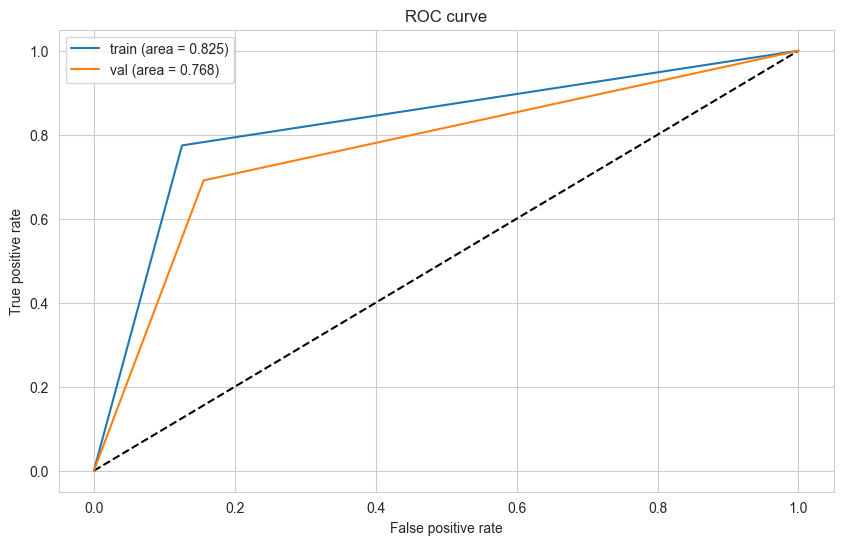

In [315]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [316]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)  # default learning rate value is 0.001 # i tried learning_rate=0.03 and the results were very bad so i decided to use smaller value
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [317]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1)

Epoch 1/300
127/127 [==============================] - 1s 4ms/step - loss: 0.6335 - recall: 0.6461 - val_loss: 0.5248 - val_recall: 0.4153
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5601 - recall: 0.7121 - val_loss: 0.4598 - val_recall: 0.4536
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5179 - recall: 0.7333 - val_loss: 0.5300 - val_recall: 0.7432
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5038 - recall: 0.7485 - val_loss: 0.5556 - val_recall: 0.7596
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4853 - recall: 0.7442 - val_loss: 0.4644 - val_recall: 0.6776
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4781 - recall: 0.7515 - val_loss: 0.5204 - val_recall: 0.7213
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4741 - recall: 0.7576 - val_loss: 0.4710 - val_recall: 0.6831
Epoch 8/300
127/127 [======

<Axes: >

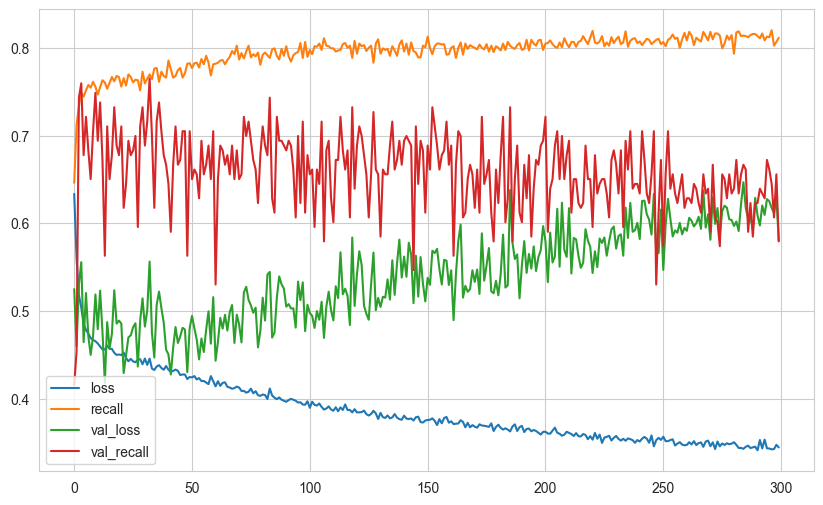

In [318]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [319]:
loss, lr_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", lr_recall)

loss:  0.5605937242507935
accuracy:  0.6617646813392639


In [320]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[5728  722]
 [ 351 1299]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6450
           1       0.64      0.79      0.71      1650

    accuracy                           0.87      8100
   macro avg       0.79      0.84      0.81      8100
weighted avg       0.88      0.87      0.87      8100



In [321]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[674 122]
 [ 69 135]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       796
           1       0.53      0.66      0.59       204

    accuracy                           0.81      1000
   macro avg       0.72      0.75      0.73      1000
weighted avg       0.83      0.81      0.82      1000



In [322]:
roc_auc_score(y_test, y_pred)

0.7542491871120307

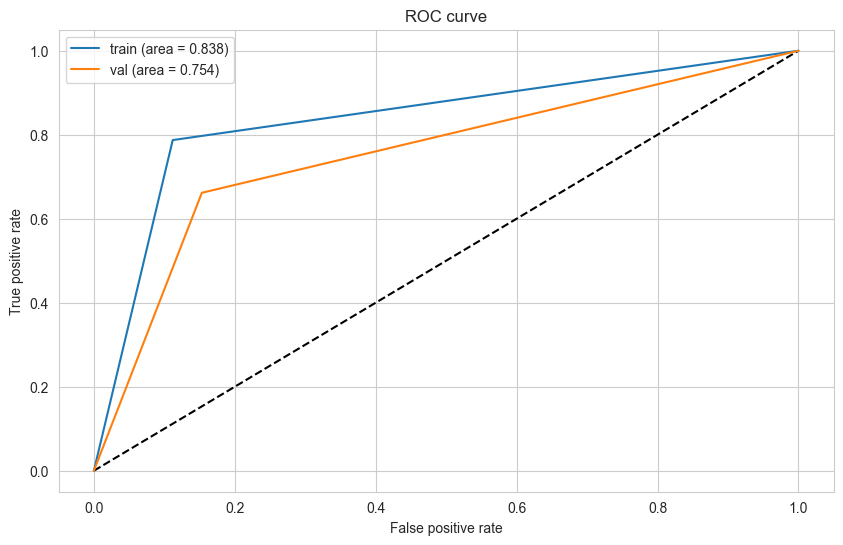

In [323]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Dropout Layer

In [324]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.15))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.15))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.15))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [325]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1)

Epoch 1/300
127/127 [==============================] - 1s 3ms/step - loss: 0.6856 - recall: 0.5594 - val_loss: 0.6307 - val_recall: 0.3716
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6589 - recall: 0.6588 - val_loss: 0.6081 - val_recall: 0.5792
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6397 - recall: 0.6903 - val_loss: 0.6102 - val_recall: 0.6011
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6264 - recall: 0.7048 - val_loss: 0.6300 - val_recall: 0.6831
Epoch 5/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6207 - recall: 0.7121 - val_loss: 0.6006 - val_recall: 0.6557
Epoch 6/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6118 - recall: 0.7018 - val_loss: 0.5818 - val_recall: 0.6339
Epoch 7/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6019 - recall: 0.6861 - val_loss: 0.5615 - val_recall: 0.6393
Epoch 8/300
127/127 [======

<Axes: >

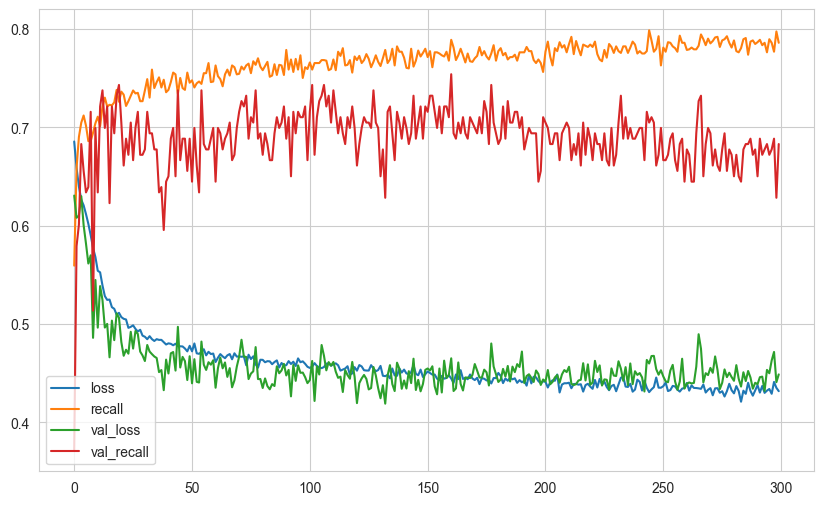

In [326]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [327]:
loss, dropout_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", dropout_recall)

loss:  0.44556498527526855
accuracy:  0.7549019455909729


In [328]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[5241 1209]
 [ 296 1354]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      6450
           1       0.53      0.82      0.64      1650

    accuracy                           0.81      8100
   macro avg       0.74      0.82      0.76      8100
weighted avg       0.86      0.81      0.83      8100



In [329]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[629 167]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.75      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.84      0.78      0.80      1000



In [330]:
roc_auc_score(y_test, y_pred)

0.7725514829047196

In [331]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [332]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [333]:
early_stop = EarlyStopping(monitor="val_loss", 
                           mode="min", #because i want to minimize the loss
                           verbose=1, 
                           patience=20, 
                           restore_best_weights=True)

In [334]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 2s 4ms/step - loss: 0.6716 - recall: 0.7515 - val_loss: 0.6438 - val_recall: 0.5464
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6153 - recall: 0.6703 - val_loss: 0.6084 - val_recall: 0.6393
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5848 - recall: 0.6812 - val_loss: 0.5710 - val_recall: 0.6339
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5688 - recall: 0.7097 - val_loss: 0.5868 - val_recall: 0.6995
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5533 - recall: 0.6933 - val_loss: 0.5447 - val_recall: 0.6557
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5298 - recall: 0.7115 - val_loss: 0.5469 - val_recall: 0.7158
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5075 - recall: 0.7321 - val_loss: 0.5240 - val_recall: 0.7158
Epoch 8/300
127/127 [======

In [335]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<Axes: >

In [336]:
loss, stop_loss_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", stop_loss_recall)

loss:  0.4005441665649414
accuracy:  0.6960784196853638


In [337]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[5571  879]
 [ 469 1181]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      6450
           1       0.57      0.72      0.64      1650

    accuracy                           0.83      8100
   macro avg       0.75      0.79      0.76      8100
weighted avg       0.85      0.83      0.84      8100



In [338]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 876us/step
[[668 128]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       796
           1       0.53      0.70      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.84      0.81      0.82      1000



In [339]:
roc_auc_score(y_test, y_pred)

0.7676372056360232

In [340]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

#### Monitor the "val_recall" as metric

In [341]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [342]:
early_stop = EarlyStopping(monitor="val_recall", 
                           mode="max", #because i want to maximize the recall
                           verbose=1, 
                           patience=20, 
                           restore_best_weights=True)

In [343]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 2s 6ms/step - loss: 0.6804 - recall: 0.1897 - val_loss: 0.5902 - val_recall: 0.2514
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6554 - recall: 0.4800 - val_loss: 0.5758 - val_recall: 0.5246
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6372 - recall: 0.6091 - val_loss: 0.5446 - val_recall: 0.4973
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6236 - recall: 0.6394 - val_loss: 0.5578 - val_recall: 0.6120
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6117 - recall: 0.6691 - val_loss: 0.5176 - val_recall: 0.5246
Epoch 6/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5995 - recall: 0.6824 - val_loss: 0.5227 - val_recall: 0.6011
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5908 - recall: 0.7036 - val_loss: 0.5406 - val_recall: 0.6831
Epoch 8/300
127/127 [======

In [344]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<Axes: >

In [345]:
loss, stop_val_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", stop_val_recall)

loss:  0.5498948693275452
accuracy:  0.8186274766921997


In [346]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 1s 2ms/step
[[4430 2020]
 [ 243 1407]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      6450
           1       0.41      0.85      0.55      1650

    accuracy                           0.72      8100
   macro avg       0.68      0.77      0.68      8100
weighted avg       0.84      0.72      0.75      8100



In [347]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[528 268]
 [ 37 167]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.78       796
           1       0.38      0.82      0.52       204

    accuracy                           0.69      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.69      0.72      1000



In [348]:
roc_auc_score(y_test, y_pred)

0.7409720169474825

In [349]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Optuna!

In [350]:
import optuna

In [351]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [352]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.05)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.5, 2.5)
    w1 = trial.suggest_loguniform("w1", 2.5, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=300,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]# Mr. orion said it's wrong and we should use train ineasted of test
    return score

In [353]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)
study.best_params

[I 2023-10-29 22:05:21,876] A new study created in memory with name: no-name-662c1d1a-bba7-41a8-bf05-1b98d0a253e1


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-29 22:05:42,457] Trial 0 finished with value: 0.6890909075737 and parameters: {'n_units1': 19, 'n_units2': 64, 'n_units3': 111, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.017730727964878505, 'w0': 2.260213068871565, 'w1': 4.594136069017473}. Best is trial 0 with value: 0.6890909075737.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:05:49,079] Trial 1 finished with value: 0.26181817054748535 and parameters: {'n_units1': 54, 'n_units2': 120, 'n_units3': 31, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0033353459344805584, 'w0': 2.2943156661759083, 'w1': 4.281490229979967}. Best is trial 0 with value: 0.6890909075737.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-29 22:06:00,262] Trial 2 finished with value: 0.8939393758773804 and parameters: {'n_units1': 75, 'n_units2': 68, 'n_units3': 95, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0024304593842288825, 'w0': 0.5071503981714203, 'w1': 2.854932049887395}. Best is trial 2 with value: 0.8939393758773804.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2023-10-29 22:06:14,639] Trial 3 finished with value: 0.9212121367454529 and parameters: {'n_units1': 84, 'n_units2': 40, 'n_units3': 55, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0011579496207850257, 'w0': 0.7736399468712353, 'w1': 4.969113664094064}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 37.
Epoch 52: early stopping


[I 2023-10-29 22:06:29,798] Trial 4 finished with value: 0.7351515293121338 and parameters: {'n_units1': 64, 'n_units2': 72, 'n_units3': 24, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0018132751877759114, 'w0': 1.5165685161758287, 'w1': 2.6531220020442032}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:06:36,620] Trial 5 finished with value: 0.6424242258071899 and parameters: {'n_units1': 17, 'n_units2': 97, 'n_units3': 126, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.004221361597044497, 'w0': 1.4412302194325473, 'w1': 3.724289237599307}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 33.
Epoch 48: early stopping


[I 2023-10-29 22:06:53,060] Trial 6 finished with value: 0.8860605955123901 and parameters: {'n_units1': 34, 'n_units2': 82, 'n_units3': 91, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.001419231515926957, 'w0': 0.816739577526607, 'w1': 3.3659258954422526}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-29 22:07:04,359] Trial 7 finished with value: 0.8836363554000854 and parameters: {'n_units1': 59, 'n_units2': 38, 'n_units3': 109, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0016862323004009211, 'w0': 0.551209102118418, 'w1': 2.953363517231317}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-29 22:07:10,233] Trial 8 finished with value: 0.5587878823280334 and parameters: {'n_units1': 22, 'n_units2': 47, 'n_units3': 44, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.02232934466804312, 'w0': 1.7610237576644339, 'w1': 2.6204879498646214}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-29 22:07:16,673] Trial 9 finished with value: 0.8842424154281616 and parameters: {'n_units1': 19, 'n_units2': 64, 'n_units3': 49, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0038019877748692982, 'w0': 0.6781007602281979, 'w1': 4.591536633663029}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-29 22:07:24,724] Trial 10 finished with value: 0.9157575964927673 and parameters: {'n_units1': 113, 'n_units2': 11, 'n_units3': 69, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0010311572172866275, 'w0': 1.0105260004917715, 'w1': 4.943264388838949}. Best is trial 3 with value: 0.9212121367454529.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-29 22:07:31,232] Trial 11 finished with value: 0.9333333373069763 and parameters: {'n_units1': 114, 'n_units2': 11, 'n_units3': 65, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001042007539197849, 'w0': 0.9990852504485404, 'w1': 4.977936930924042}. Best is trial 11 with value: 0.9333333373069763.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-29 22:07:38,138] Trial 12 finished with value: 0.9169697165489197 and parameters: {'n_units1': 113, 'n_units2': 8, 'n_units3': 67, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0011886099925340103, 'w0': 0.8843927946887474, 'w1': 4.085024879163365}. Best is trial 11 with value: 0.9333333373069763.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:07:44,495] Trial 13 finished with value: 0.8236363530158997 and parameters: {'n_units1': 90, 'n_units2': 28, 'n_units3': 67, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.008812046066396361, 'w0': 1.0883976215023548, 'w1': 4.887192971666742}. Best is trial 11 with value: 0.9333333373069763.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-29 22:07:53,131] Trial 14 finished with value: 0.918181836605072 and parameters: {'n_units1': 127, 'n_units2': 30, 'n_units3': 50, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.04967767484453324, 'w0': 0.7331400528457968, 'w1': 4.985589622155228}. Best is trial 11 with value: 0.9333333373069763.


{'n_units1': 114,
 'n_units2': 11,
 'n_units3': 65,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.001042007539197849,
 'w0': 0.9990852504485404,
 'w1': 4.977936930924042}

In [354]:
#pip install plotly

In [355]:
#to visualize the results of optuna 
#optuna.visualization.plot_optimization_history(study)

### build a model with the best hyperparameters

In [356]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=300,
    callbacks=[early_stop],
    class_weight= {0: w0, 1:w1},
    verbose=1,
)

Epoch 1/300
127/127 [==============================] - 1s 4ms/step - loss: 1.1546 - recall: 0.8242 - val_loss: 0.6969 - val_recall: 0.7541
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 1.0686 - recall: 0.7764 - val_loss: 0.5973 - val_recall: 0.6503
Epoch 3/300
127/127 [==============================] - 0s 4ms/step - loss: 1.0304 - recall: 0.7648 - val_loss: 0.6428 - val_recall: 0.7486
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.9982 - recall: 0.7806 - val_loss: 0.5285 - val_recall: 0.5956
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.9625 - recall: 0.7758 - val_loss: 0.7825 - val_recall: 0.8962
Epoch 6/300
127/127 [==============================] - 0s 3ms/step - loss: 0.9148 - recall: 0.8012 - val_loss: 0.5836 - val_recall: 0.7705
Epoch 7/300
127/127 [==============================] - 0s 3ms/step - loss: 0.8852 - recall: 0.8048 - val_loss: 0.5576 - val_recall: 0.7596
Epoch 8/300
127/127 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [357]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<Axes: >

In [358]:
loss, optuna_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", optuna_recall)

loss:  0.8152364492416382
accuracy:  0.9215686321258545


In [359]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[3069 3381]
 [ 137 1513]]
              precision    recall  f1-score   support

           0       0.96      0.48      0.64      6450
           1       0.31      0.92      0.46      1650

    accuracy                           0.57      8100
   macro avg       0.63      0.70      0.55      8100
weighted avg       0.83      0.57      0.60      8100



In [360]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[355 441]
 [ 16 188]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.61       796
           1       0.30      0.92      0.45       204

    accuracy                           0.54      1000
   macro avg       0.63      0.68      0.53      1000
weighted avg       0.82      0.54      0.58      1000



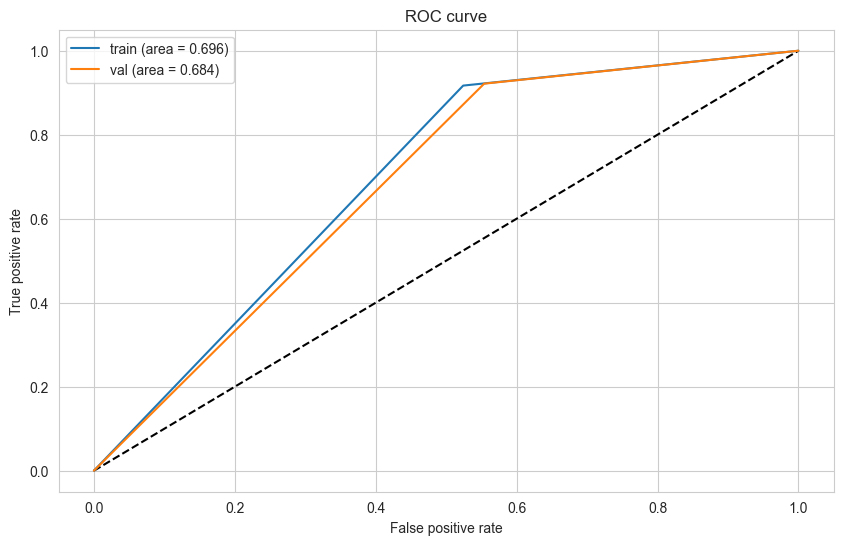

In [361]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Model comparasion

In [362]:
compare = pd.DataFrame(
    {
        "Model": ["wieght_recall", "no_weight_recall", "lr_recall", "dropout_recall", "stop_loss_recall","stop_val_recall", "optuna_recall"],
        "Recall": [wieght_recall, no_weight_recall, lr_recall, dropout_recall, stop_loss_recall,stop_val_recall, optuna_recall],
    }
)

plt.figure(figsize=(14, 10))
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
for label in ax.containers:
    ax.bar_label(label, fmt="%.3f")

### Even though i got a higher recall result in the optuna model, but i decided to go with "Early stop vall recall" model as it gave me a good recall beside an acceptable value of precision

# Final Model and Model Deployment

### Saving Final Model and Scaler

In [363]:
import pickle

pickle.dump(column_trans, open("scaler_churn_pred", "wb"))

In [364]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [365]:
early_stop = EarlyStopping(monitor="val_recall", 
                           mode="max", #because i want to maximize the recall
                           verbose=1, 
                           patience=20, 
                           restore_best_weights=True)

In [366]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 2s 3ms/step - loss: 0.6798 - recall: 0.3473 - val_loss: 0.6039 - val_recall: 0.3770
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6595 - recall: 0.5261 - val_loss: 0.5842 - val_recall: 0.4645
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6463 - recall: 0.6000 - val_loss: 0.5676 - val_recall: 0.4809
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6347 - recall: 0.6200 - val_loss: 0.5890 - val_recall: 0.6721
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6131 - recall: 0.6691 - val_loss: 0.5604 - val_recall: 0.6448
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5788 - recall: 0.7024 - val_loss: 0.5633 - val_recall: 0.6940
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5583 - recall: 0.7152 - val_loss: 0.5490 - val_recall: 0.6940
Epoch 8/300
127/127 [======

In [367]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<Axes: >

In [368]:
loss, stop_val_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", stop_val_recall)

loss:  0.5668628215789795
accuracy:  0.8186274766921997


In [369]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 785us/step
[[530 266]
 [ 37 167]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       796
           1       0.39      0.82      0.52       204

    accuracy                           0.70      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.70      0.73      1000



In [370]:
roc_auc_score(y_test, y_pred)

0.7422282983545176

In [371]:
model.save("model_churn_pred.h5")  # creates a HDF5 file 'my_model.h5'

### Loading Model and Scaler

In [372]:
from tensorflow.keras.models import load_model

In [373]:
model_churn_pred = load_model("model_churn_pred.h5")
scaler_churn_pred = pickle.load(open("scaler_churn_pred", "rb"))

## Prediction

In [374]:
single_customer = df.drop("Exited", axis=1).iloc[[0], :]
single_customer

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France       0   42       2    0.000              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1       101348.880

In [375]:
single_customer = scaler_churn_pred.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 0.538     , 0.32432432,
        0.2       , 0.        , 0.        , 0.50654122, 0.        ,
        1.        , 1.        ]])

In [376]:
(model_churn_pred.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 111ms/step


array([[1]])

In [377]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___